# Inspect Files

This file contains code to load G3 files produced by ``g3_packager``, and view some of their data.

To run this Jupyter notebook on the CCAT Control Computer, see [``HOWTORUN.md``](./HOWTORUN.md).

## Setup

In [3]:
import numpy as np
import os
import g3_utils as ut
import matplotlib.pyplot as plt
from spt3g import core
from spt3g import calibration

In [4]:
control_computer_g3_dir = "/media/player1/blast2020fc1/blasttng_g3"

# file produced by g3_packager to analyze
filename = os.path.join(control_computer_g3_dir, "testing/roach1_pass3.g3")

### File Content Overview

Which frames are present in the g3 file?

In [3]:
pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=filename)
pipe.Add(ut.FrameCounter)
pipe.Run()


Calibration
PipelineInfo
Scan (x117)
EndProcessing


### File Content Full Dump

Print all the contents of the file.

In [4]:
pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=filename)
pipe.Add(core.Dump)
pipe.Run()

Frame (Calibration) [
"BolometerProperties" (spt3g.calibration.BolometerPropertiesMap) => 381 elements
"cal_lamp_data" (so3g.G3SuperTimestream) => G3SuperTimestream(762, 3000)
"target_sweeps" (spt3g.core.G3TimestreamMap) => Timestreams from 1143 detectors
"x_shifts" (spt3g.core.G3MapDouble) => 381 elements
"y_shifts" (spt3g.core.G3MapDouble) => 381 elements
]
Frame (PipelineInfo) [
"22-Apr-2025:18:54:57.331589000" (spt3g.core.G3PipelineInfo) => UNKNOWN VCS branch, local diffs
"22-Apr-2025:18:58:12.551713000" (spt3g.core.G3PipelineInfo) => UNKNOWN VCS branch, local diffs
]
Frame (Scan) [
"alt" (spt3g.core.G3Timestream) => 1428 samples at 473.0 Hz
"az" (spt3g.core.G3Timestream) => 1428 samples at 473.0 Hz
"data" (so3g.G3SuperTimestream) => G3SuperTimestream(762, 1428)
"el" (spt3g.core.G3Timestream) => 1428 samples at 473.0 Hz
"lat" (spt3g.core.G3Timestream) => 1428 samples at 473.0 Hz
"lon" (spt3g.core.G3Timestream) => 1428 samples at 473.0 Hz
"time" (spt3g.core.G3Time) => 22-Apr-2025:18

### Scan Frames

Get some sample scan frames that can be inspected more closely

In [5]:
first_scan_grabber = ut.FirstFrameGrabber(core.G3FrameType.Scan)
last_scan_grabber = ut.LastFrameGrabber(core.G3FrameType.Scan)

pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=filename)
pipe.Add(first_scan_grabber)
pipe.Add(last_scan_grabber)
pipe.Run()

# store the frames for analysis
first_scan_frame = first_scan_grabber.first_frame
last_scan_frame = last_scan_grabber.last_frame

print("\nFirst Scan Frame: ", first_scan_frame)
print("\nLast Scan Frame: ", last_scan_frame)

Found the last frame with type: Scan!
The frame is now stored in <g3_utils.tools.LastFrameGrabber object at 0x7f8dec1e1cf0>'s last_frame attribute.

First Scan Frame:  Frame (Scan) [
"alt" (spt3g.core.G3Timestream) => 1428 samples at 473.0 Hz
"az" (spt3g.core.G3Timestream) => 1428 samples at 473.0 Hz
"data" (so3g.G3SuperTimestream) => G3SuperTimestream(762, 1428)
"el" (spt3g.core.G3Timestream) => 1428 samples at 473.0 Hz
"lat" (spt3g.core.G3Timestream) => 1428 samples at 473.0 Hz
"lon" (spt3g.core.G3Timestream) => 1428 samples at 473.0 Hz
"time" (spt3g.core.G3Time) => 22-Apr-2025:18:54:57.330815000
]

Last Scan Frame:  Frame (Scan) [
"alt" (spt3g.core.G3Timestream) => 935 samples at 473.1 Hz
"az" (spt3g.core.G3Timestream) => 935 samples at 473.1 Hz
"data" (so3g.G3SuperTimestream) => G3SuperTimestream(762, 935)
"el" (spt3g.core.G3Timestream) => 935 samples at 473.1 Hz
"lat" (spt3g.core.G3Timestream) => 935 samples at 473.1 Hz
"lon" (spt3g.core.G3Timestream) => 935 samples at 473.1 Hz
"t

In [6]:
np.asarray(first_scan_frame['az']) / core.G3Units.deg

array([110.75081235, 110.75112617, 110.751351  , ..., 111.25397162,
       111.25453064, 111.25453064], shape=(1428,))

### Calibration Frame

Get a calibration frame and see what it contains.

In [6]:
calframe_grabber = ut.FirstFrameGrabber(core.G3FrameType.Calibration)

pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=filename)
pipe.Add(calframe_grabber)
pipe.Run()

cal_frame = calframe_grabber.first_frame

print("\nCalibration Frame: ", cal_frame)


Calibration Frame:  Frame (Calibration) [
"BolometerProperties" (spt3g.calibration.BolometerPropertiesMap) => 381 elements
"cal_lamp_data" (so3g.G3SuperTimestream) => G3SuperTimestream(762, 3000)
"target_sweeps" (spt3g.core.G3TimestreamMap) => Timestreams from 1143 detectors
"x_shifts" (spt3g.core.G3MapDouble) => 381 elements
"y_shifts" (spt3g.core.G3MapDouble) => 381 elements
]


-0.20521168539630708

#### Detector Layout

Plot the detector layout stored in the calibration frame

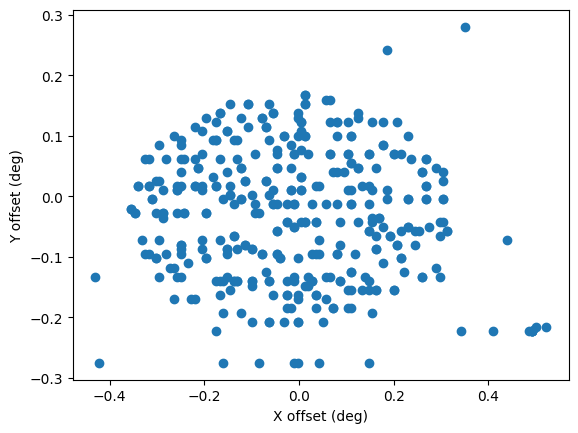

In [29]:
x_vals = np.asarray(cal_frame["x_shifts"].values()) / core.G3Units.deg
y_vals = np.asarray(cal_frame["y_shifts"].values()) / core.G3Units.deg
# x_vals = [det.x_offset / core.G3Units.deg for det in cal_frame["BolometerProperties"].values()]
# y_vals = [det.y_offset / core.G3Units.deg for det in cal_frame["BolometerProperties"].values()]
plt.scatter(x_vals, y_vals)
plt.xlabel("X offset (deg)")
plt.ylabel("Y offset (deg)")
plt.show()

### Plot RA/Dec

Plot the boresight path in celestical coordinates for the data in this file.


Calibration
PipelineInfo
Scan (x117)
EndProcessing


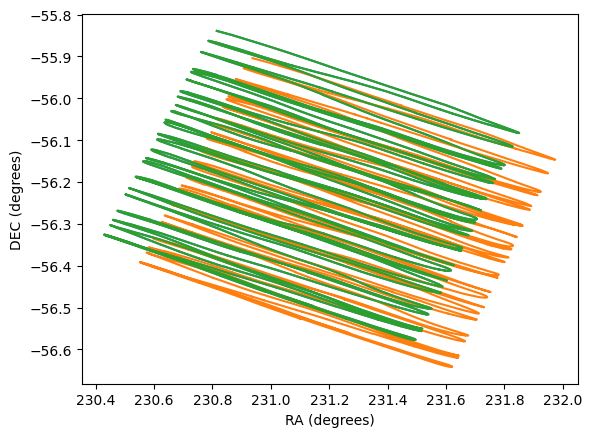

In [10]:
pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=str(filename))

pipe.Add(ut.add_radec_astropy, ra="ra_ast", dec="dec_ast", use_middle_loc=True)
pipe.Add(ut.add_radec_spt3g, ra="ra_spt", dec="dec_spt", use_middle_loc=True)
pipe.Add(ut.add_radec_so3g, ra="ra_so", dec="dec_so")

pipe.Add(ut.PlotRaDec, ra_key="ra_ast", dec_key="dec_ast")
pipe.Add(ut.PlotRaDec, ra_key="ra_so", dec_key="dec_so")
pipe.Add(ut.PlotRaDec, ra_key="ra_spt", dec_key="dec_spt")

pipe.Add(ut.FrameCounter)
pipe.Run(profile=True)

"""
USE MIDDLE LOC = FALSE

Pipeline profiling results:
spt3g.core.G3Reader: 0.080004 user, 0.062574 system, 120 frames (0.001188 s per input frame)
_pipelineinfo: 0.000000 user, 0.000000 system, 120 frames (0.000000 s per input frame)
g3_utils.coords.add_radec_astropy: 41.395502 user, 0.032579 system, 120 frames (0.345234 s per input frame)
g3_utils.coords.add_radec_so3g: 0.077367 user, 0.000109 system, 120 frames (0.000646 s per input frame)
g3_utils.coords.add_radec_spt3g: 21.313328 user, 0.000015 system, 120 frames (0.177611 s per input frame)
g3_utils.tools.PlotRaDec: 0.008759 user, 0.000000 system, 120 frames (0.000073 s per input frame)
g3_utils.tools.PlotRaDec: 0.011984 user, 0.000000 system, 120 frames (0.000100 s per input frame)
g3_utils.tools.PlotRaDec: 0.004014 user, 0.003986 system, 120 frames (0.000067 s per input frame)
g3_utils.tools.FrameCounter: 0.016010 user, 0.000000 system, 120 frames (0.000133 s per input frame)
Total: 62.906968 user, 0.099263 system
Peak memory consumption (294.0 MB) in module g3_utils.coords.add_radec_astropy

USE MIDDLE LOC = TRUE

Pipeline profiling results:
spt3g.core.G3Reader: 0.100845 user, 0.043896 system, 120 frames (0.001206 s per input frame)
_pipelineinfo: 0.008004 user, 0.000000 system, 120 frames (0.000067 s per input frame)
g3_utils.coords.add_radec_astropy: 40.954447 user, 0.057017 system, 120 frames (0.341762 s per input frame)
g3_utils.coords.add_radec_spt3g: 21.197848 user, 0.004446 system, 120 frames (0.176686 s per input frame)
g3_utils.coords.add_radec_so3g: 0.090917 user, 0.000224 system, 120 frames (0.000760 s per input frame)
g3_utils.tools.PlotRaDec: 0.008123 user, 0.000001 system, 120 frames (0.000068 s per input frame)
g3_utils.tools.PlotRaDec: 0.015991 user, 0.000000 system, 120 frames (0.000133 s per input frame)
g3_utils.tools.PlotRaDec: 0.012004 user, 0.000000 system, 120 frames (0.000100 s per input frame)
g3_utils.tools.FrameCounter: 0.008005 user, 0.004000 system, 120 frames (0.000100 s per input frame)
Total: 62.396184 user, 0.109584 system
Peak memory consumption (294.2 MB) in module g3_utils.coords.add_radec_astropy
""";

In [11]:
pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=filename)
pipe.Run(profile=True)

### Plot DF For A Sample KID

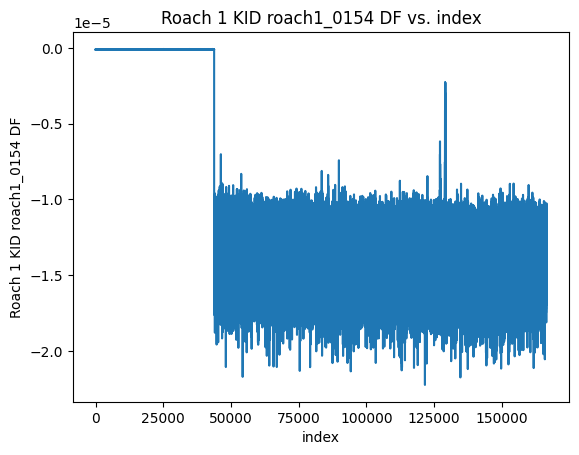

In [12]:
kid_to_plot = "roach1_0154"
def get_kid_df(frame):
    idx = int(np.where(np.asarray(frame['df'].names) == kid_to_plot)[0][0])
    return frame['df'].data[idx]

pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=filename)
pipe.Add(ut.AddScanDF)
pipe.Add(ut.GenericPlotter,
         array_getter=get_kid_df,
         label=f"Roach 1 KID {kid_to_plot} DF")
pipe.Run()

### Plot Single KID Maps

Plot some sample KID maps, using non-normalized DF

In [13]:
# center of the sky map
ra0 = 231.15 * core.G3Units.deg
dec0 = -56.2 * core.G3Units.deg

# map dimensions
xlen = 1.4 * core.G3Units.deg
ylen = 0.9 * core.G3Units.deg

# pixel resolution
res = 1 * core.G3Units.arcmin

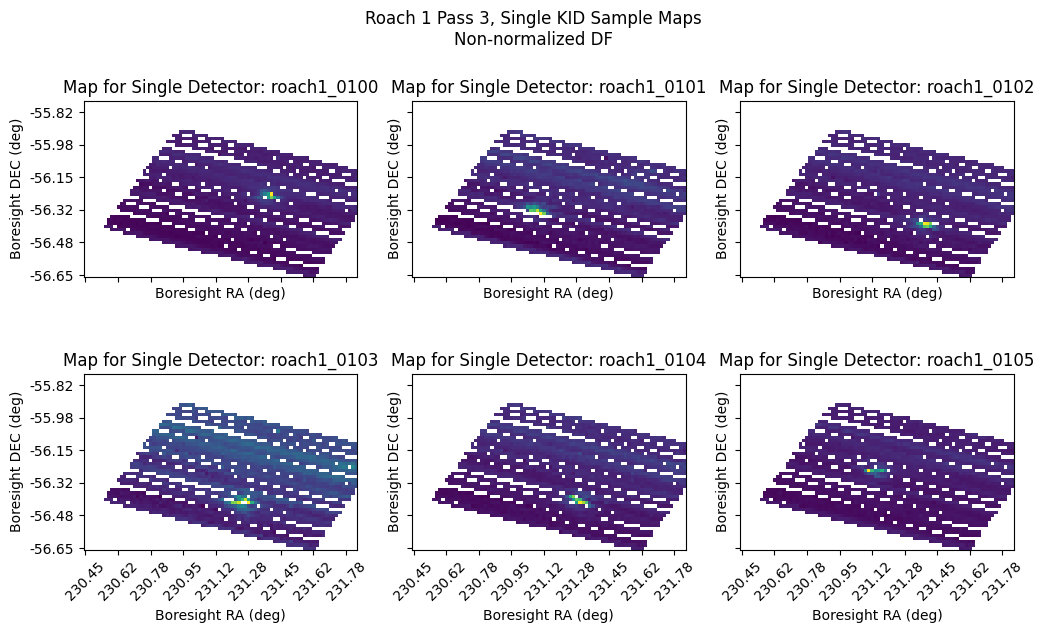

In [14]:
# instantiate binners
binners = [
    ut.SingleMapBinner(kid=f"roach1_{i:04}", timestreams="df", ra0=ra0, dec0=dec0, xlen=xlen, ylen=ylen, res=res)
    for i in range(100, 106)  # sample kid ids
]

# create the pipeline
pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=filename)
pipe.Add(ut.add_radec_so3g)
pipe.Add(ut.AddScanDF)
for binner in binners:
    pipe.Add(binner)
pipe.Run()

fig, axs = plt.subplots(2, 3, figsize=(12, 6.5), sharex='all', sharey='all')
fig.suptitle("Roach 1 Pass 3, Single KID Sample Maps"
            "\nNon-normalized DF")

for binner, ax in zip(binners, axs.flat):
    binner.plot(ax=ax, show=False)
plt.show()